In [9]:
grille = [[1,0,0,1],[0,0,1,0],[0,0,0,0],[1,0,0,0]]

# Partie 1 : Le virus

### Question 2.

In [10]:
def updateEtat(grille, i, j):
    
    if grille[i][j] == 1:
        return 1
    
    voisins_infectes = 0
    if i>0:
        voisins_infectes += grille[i-1][j]
    if i<len(grille)-1:
        voisins_infectes += grille[i+1][j]
    if j>0:
        voisins_infectes += grille[i][j-1]
    if j<len(grille[0])-1:
        voisins_infectes += grille[i][j+1]

    if voisins_infectes >= 2:
        return 1
    else:
        return 0




### Question 3.

In [11]:
def updateGrille(grille):
    # On crée une nouvelle grille
    nouvelle_grille = []
    
    # On met à jour chaque cellule
    for i in range(len(grille)):
        grille_ligne = []
        for j in range(len(grille[0])):
            grille_ligne.append(updateEtat(grille, i, j))
        nouvelle_grille.append(grille_ligne)
    
    # On retourne la nouvelle grille
    return nouvelle_grille

### Question 4.

In [12]:
def propagation(grille):
    n_jour = 0
    stabilized = False
    while not(stabilized):
        nouvelle_grille = updateGrille(grille)
        if nouvelle_grille == grille:
            stabilized = True
        grille = nouvelle_grille
        n_jour += 1
    return n_jour-1, grille

### Question 5.

In [13]:
propagation(grille)

(9, [[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]])

### Question 6.

In [14]:
def nombreInfectes(grille):
    return sum([sum(ligne) for ligne in grille])

### Question 7.

In [15]:
import random 

def createRandomGrille(n,p):
    grille = []
    for i in range(n):
        ligne = []
        for j in range(n):
            etat = 0
            if random.random() < p:
                etat = 1
            ligne.append(etat)
        grille.append(ligne)
    return grille

### Question 8.

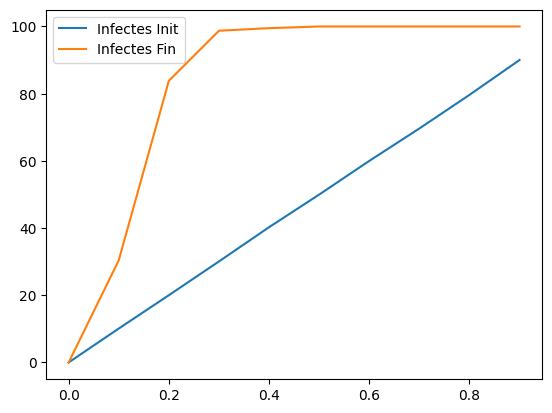

In [16]:
import matplotlib.pyplot as plt

liste_proba = [0.1*i for i in range(10)]
n_tentatives = 100
taille_grille = 10
liste_infectes_init = []
liste_infectes_fin = []
for i in range(len(liste_proba)):
    p = liste_proba[i]
    n_infectes_init = 0
    n_infectes_fin = 0
    
    for j in range(n_tentatives):
        grille_initiale = createRandomGrille(taille_grille, p)
        n_infectes_init += nombreInfectes(grille_initiale)
        nombre_jours, grille_finale = propagation(grille_initiale)
        n_infectes_fin += nombreInfectes(grille_finale)
        
    n_infectes_init = n_infectes_init/n_tentatives
    n_infectes_fin = n_infectes_fin/n_tentatives
    liste_infectes_init.append(n_infectes_init)
    liste_infectes_fin.append(n_infectes_fin)

plt.plot(liste_proba, liste_infectes_init, label="Infectes Init")
plt.plot(liste_proba, liste_infectes_fin, label="Infectes Fin")

plt.legend()
plt.show()    

A partir $p=0.2$ (20% d'infectés) toute la population devient infecté à la fin.

### Question 9.

Il suffit d'un infecté dans la grille pour que tout le monde soit infecté à la fin.

### Question 10.

Ne marche pas dans un notebook.

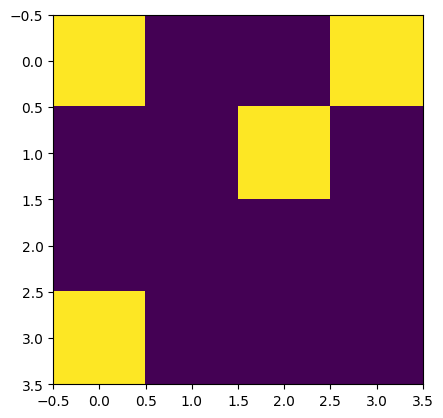

In [17]:
plt.imshow(grille)
plt.show()

# Partie 2 : Vaccin

In [18]:
grille = [[1,2,0,1],[0,0,1,0],[0,0,0,0],[1,0,0,0]]

### Question 12.

In [19]:
def updateEtat(grille, i, j):
    
    if grille[i][j] > 0:
        return grille[i][j]
    
    voisins_infectes = 0
    if i>0 and grille[i-1][j] == 1:
        voisins_infectes += 1
    if i<len(grille)-1 and grille[i+1][j] == 1:
        voisins_infectes +=  1
    if j>0 and grille[i][j-1] == 1:
        voisins_infectes += 1
    if j<len(grille[0])-1 and grille[i][j+1] == 1:
        voisins_infectes += 1

    if voisins_infectes >= 2:
        return 1
    else:
        return 0




In [20]:
def nombreInfectes(grille):
    total = 0
    for ligne in range(len(grille)):
        for colonne in range(len(grille[0])):
            if grille[ligne][colonne] == 1:
                total += 1
    return total 

def nombreInfectesV2(grille):
    return sum([len([grille[i,j] for j in range(len(grille[0])) if grille[i,j] == 1]) for i in range(len(grille))])



### Question 13.

In [21]:
def createRandomGrille(n, p_virus, p_vaccin):
    grille = []
    for i in range(n):
        ligne = []
        for j in range(n):
            etat = 0
            x = random.random()
            if x < p_virus:
                etat = 1
            elif x < p_virus+p_vaccin:
                etat = 2
            ligne.append(etat)
        grille.append(ligne)
    return grille


### Question 14.

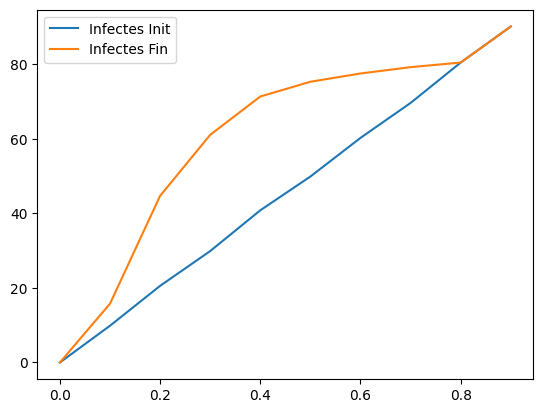

In [22]:
import matplotlib.pyplot as plt

liste_proba = [0.1*i for i in range(10)]
n_tentatives = 100
taille_grille = 10
liste_infectes_init = []
liste_infectes_fin = []
for i in range(len(liste_proba)):
    p = liste_proba[i]
    n_infectes_init = 0
    n_infectes_fin = 0
    
    for j in range(n_tentatives):
        grille_initiale = createRandomGrille(taille_grille, p, 0.2)
        n_infectes_init += nombreInfectes(grille_initiale)
        nombre_jours, grille_finale = propagation(grille_initiale)
        n_infectes_fin += nombreInfectes(grille_finale)
        
    n_infectes_init = n_infectes_init/n_tentatives
    n_infectes_fin = n_infectes_fin/n_tentatives
    liste_infectes_init.append(n_infectes_init)
    liste_infectes_fin.append(n_infectes_fin)

plt.plot(liste_proba, liste_infectes_init, label="Infectes Init")
plt.plot(liste_proba, liste_infectes_fin, label="Infectes Fin")

plt.legend()
plt.show()    

On remarque qu'il y a moins d'infecté lorsque certaines personnes sont vaccinées

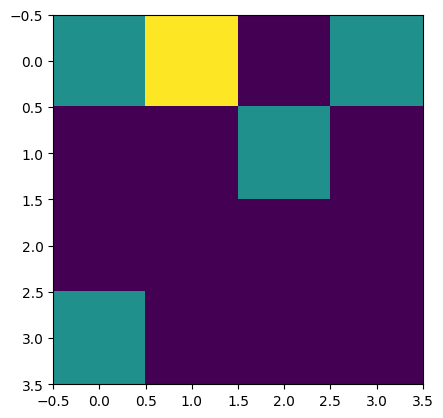

In [23]:
plt.imshow(grille)
plt.show()